### Step 1: load data 

In [1]:
# Load Python Library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
# Read in data from source 
df_raw = pd.read_csv('Speed Dating Data.csv')

In [3]:
# To reset display width
pd.set_option('max_columns',200)
pd.set_option('max_rows',200)

In [4]:
# Make sure it's loaded properly
df_raw.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,1,11.0,0,0.14,0,27.0,2.0,35.0,20.0,20.0,20.0,0.0,5.0,0,6.0,8.0,8.0,8.0,8.0,6.0,7.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,6.0,9.0,7.0,7.0,6.0,5.0,7.0,6.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,2,12.0,0,0.54,0,22.0,2.0,60.0,0.0,0.0,40.0,0.0,0.0,0,7.0,8.0,10.0,7.0,7.0,5.0,8.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,7.0,8.0,7.0,8.0,5.0,6.0,7.0,5.0,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,3,13.0,1,0.16,1,22.0,4.0,19.0,18.0,19.0,18.0,14.0,12.0,1,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,5.0,8.0,9.0,8.0,5.0,7.0,7.0,NaN,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,4,14.0,1,0.61,0,23.0,2.0,30.0,5.0,15.0,40.0,5.0,5.0,1,7.0,8.0,9.0,8.0,9

### Step 2: understand and clean data

In [5]:
# Check missing data
df_raw.count()

iid         8378
id          8377
gender      8378
idg         8378
condtn      8378
wave        8378
round       8378
position    8378
positin1    6532
order       8378
partner     8378
pid         8368
match       8378
int_corr    8220
samerace    8378
age_o       8274
race_o      8305
pf_o_att    8289
pf_o_sin    8289
pf_o_int    8289
pf_o_fun    8280
pf_o_amb    8271
pf_o_sha    8249
dec_o       8378
attr_o      8166
sinc_o      8091
intel_o     8072
fun_o       8018
amb_o       7656
shar_o      7302
like_o      8128
prob_o      8060
met_o       7993
age         8283
field       8315
field_cd    8296
undergra    4914
mn_sat      3133
tuition     3583
race        8315
imprace     8299
imprelig    8299
from        8299
zipcode     7314
income      4279
goal        8299
date        8281
go_out      8299
career      8289
career_c    8240
sports      8299
tvsports    8299
exercise    8299
dining      8299
museums     8299
art         8299
hiking      8299
gaming      8299
clubbing    82

In [6]:
# Select the columns that are of interest to my study
col_select = ['gender','match','int_corr','samerace','age_o','race_o','dec_o','attr_o','sinc_o','intel_o','fun_o','amb_o',\
              'shar_o','like_o','age','field_cd','race','dec','attr','sinc','intel','fun','amb','shar','like','prob']

In [7]:
# Take a quick look of the subset
df_temp = df_raw[col_select]
df_temp.head()

,gender,match,int_corr,samerace,age_o,race_o,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,age,field_cd,race,dec,attr,sinc,intel,fun,amb,shar,like,prob
0,0,0,0.14,0,27.0,2.0,0,6.0,8.0,8.0,8.0,8.0,6.0,7.0,21.0,1.0,4.0,1,6.0,9.0,7.0,7.0,6.0,5.0,7.0,6.0
1,0,0,0.54,0,22.0,2.0,0,7.0,8.0,10.0,7.0,7.0,5.0,8.0,21.0,1.0,4.0,1,7.0,8.0,7.0,8.0,5.0,6.0,7.0,5.0
2,0,1,0.16,1,22.0,4.0,1,10.0,10.0,10.0,10.0,10.0,10.0,10.0,21.0,1.0,4.0,1,5.0,8.0,9.0,8.0,5.0,7.0,7.0,NaN
3,0,1,0.61,0,23.0,2.0,1,7.0,8.0,9.0,8.0,9.0,8.0,7.0,21.0,1.0,4.0,1,7.0,6.0,8.0,7.0,6.0,8.0,7.0,6.0
4,0,1,0.21,0,24.0,3.0,1,8.0,7.0,9.0,6.0,9.0,7.0,8.0,21.0,1.0,4.0,1,5.0,6.0,7.0,7.0,6.0,6.0,6.0,6.0


In [8]:
df_temp.dtypes

gender        int64
match         int64
int_corr    float64
samerace      int64
age_o       float64
race_o      float64
dec_o         int64
attr_o      float64
sinc_o      float64
intel_o     float64
fun_o       float64
amb_o       float64
shar_o      float64
like_o      float64
age         float64
field_cd    float64
race        float64
dec           int64
attr        float64
sinc        float64
intel       float64
fun         float64
amb         float64
shar        float64
like        float64
prob        float64
dtype: object

In [9]:
# Check missing data from this subset
df_temp.count()

gender      8378
match       8378
int_corr    8220
samerace    8378
age_o       8274
race_o      8305
dec_o       8378
attr_o      8166
sinc_o      8091
intel_o     8072
fun_o       8018
amb_o       7656
shar_o      7302
like_o      8128
age         8283
field_cd    8296
race        8315
dec         8378
attr        8176
sinc        8101
intel       8082
fun         8028
amb         7666
shar        7311
like        8138
prob        8069
dtype: int64

In [10]:
# Check what are the unique values in each feature: 
def unique(col):
    print col, df_temp[col].unique()
for col in col_select: 
    unique(col)

gender [0 1]
match [0 1]
int_corr [ 0.14  0.54  0.16  0.61  0.21  0.25  0.34  0.5   0.28 -0.36  0.29  0.18
  0.1  -0.21  0.32  0.73  0.6   0.07  0.11  0.39 -0.24 -0.14  0.09 -0.04
 -0.3  -0.26 -0.15 -0.47 -0.18  0.05  0.37  0.35  0.15 -0.19 -0.43  0.
 -0.17  0.08 -0.16  0.06 -0.05 -0.13 -0.06  0.33 -0.51  0.12  0.19  0.47
  0.03  0.46  0.43  0.52 -0.46 -0.27  0.59  0.31 -0.34 -0.03 -0.11  0.42
 -0.4  -0.23  0.17  0.68 -0.01 -0.35  0.3   0.65  0.24  0.41  0.49  0.01
  0.22 -0.08  0.27  0.44  0.62 -0.2  -0.02 -0.33 -0.52 -0.1   0.58 -0.57
 -0.31 -0.07 -0.32  0.04 -0.12  0.48 -0.22 -0.29  0.38  0.53 -0.38  0.02
 -0.28  0.13  0.2    nan -0.41 -0.44  0.51 -0.48  0.4   0.26  0.77 -0.49
 -0.25 -0.09  0.45 -0.39  0.83  0.57 -0.61  0.72 -0.37  0.23 -0.58  0.8
 -0.56  0.63 -0.63  0.71  0.36  0.56  0.55  0.76  0.69  0.79  0.9   0.67
  0.66  0.81  0.64  0.74  0.75  0.85 -0.42 -0.5  -0.59  0.7   0.82  0.78
 -0.45 -0.83  0.88 -0.7  -0.62 -0.55  0.87  0.91  0.84 -0.64 -0.73 -0.54]
samerace [0 1]
age_

In [232]:
# # Replace the following fields with Mean:
# col_mean = ['int_corr','age_o','attr_o','intel_o','amb_o','age','attr3_1','intel3_1','amb3_1','attr','intel','amb','shar','prob']

# def rep_mean(col):
#     estimated =  df[col].fillna(df[col].mean())
#     estimated.rename('estimated_'+col, inplace=True)
#     return estimated
    
# for col in col_mean:
#     rep_mean(col)
    
# # Replace the following fields with Mode:
# col_mode = ['race_o','field_cd','race']

# def rep_mode(col):
#     estimated =  df[col].fillna(df[col].mode())
#     estimated.rename('estimated_'+col, inplace=True)
    
# for col in col_mode:
#     rep_mode(col)

In [11]:
# Check mode for following features:
print df_temp['race_o'].mode()
print df_temp['field_cd'].mode()
print df_temp['race'].mode()

0    2.0
dtype: float64
0    8.0
dtype: float64
0    2.0
dtype: float64


In [12]:
# Replace n/a with mode for following features: 

estimated_race_o = df_temp['race_o'].fillna(value = 2.0)
estimated_race_o.rename("estimated_race_o", inplace=True)

estimated_field_cd = df_temp['field_cd'].fillna(value = 8.0)
estimated_field_cd.rename("estimated_field_cd", inplace=True)

estimated_race = df_temp['race'].fillna(value = 2.0)
estimated_race.rename("estimated_race", inplace=True)

# Replace n/a with mean for following features: 

estimated_int_corr = df_temp['int_corr'].fillna(df_temp['int_corr'].mean())
estimated_int_corr.rename("estimated_int_corr", inplace=True)

estimated_age_o = df_temp['age_o'].fillna(df_temp['age_o'].mean())
estimated_age_o.rename("estimated_age_o", inplace=True)

estimated_attr_o = df_temp['attr_o'].fillna(df_temp['attr_o'].mean())
estimated_attr_o.rename("estimated_attr_o", inplace=True)

estimated_sinc_o = df_temp['sinc_o'].fillna(df_temp['sinc_o'].mean())
estimated_sinc_o.rename("estimated_sinc_o", inplace=True)

estimated_intel_o = df_temp['intel_o'].fillna(df_temp['intel_o'].mean())
estimated_intel_o.rename("estimated_intel_o", inplace=True)

estimated_fun_o = df_temp['fun_o'].fillna(df_temp['fun_o'].mean())
estimated_fun_o.rename("estimated_fun_o", inplace=True)

estimated_amb_o = df_temp['amb_o'].fillna(df_temp['amb_o'].mean())
estimated_amb_o.rename("estimated_amb_o", inplace=True)

estimated_shar_o = df_temp['shar_o'].fillna(df_temp['shar_o'].mean())
estimated_shar_o.rename("estimated_shar_o", inplace=True)

estimated_like_o = df_temp['like_o'].fillna(df_temp['like_o'].mean())
estimated_like_o.rename("estimated_like_o", inplace=True)

estimated_age = df_temp['age'].fillna(df_temp['age'].mean())
estimated_age.rename("estimated_age", inplace=True)

estimated_attr = df_temp['attr'].fillna(df_temp['attr'].mean())
estimated_attr.rename("estimated_attr", inplace=True)

estimated_sinc = df_temp['sinc'].fillna(df_temp['sinc'].mean())
estimated_sinc.rename("estimated_sinc", inplace=True)

estimated_intel = df_temp['intel'].fillna(df_temp['intel'].mean())
estimated_intel.rename("estimated_intel", inplace=True)

estimated_fun = df_temp['fun'].fillna(df_temp['fun'].mean())
estimated_fun.rename("estimated_fun", inplace=True)

estimated_amb = df_temp['amb'].fillna(df_temp['amb'].mean())
estimated_amb.rename("estimated_amb", inplace=True)

estimated_shar = df_temp['shar'].fillna(df_temp['shar'].mean())
estimated_shar.rename("estimated_shar", inplace=True)

estimated_like = df_temp['like'].fillna(df_temp['like'].mean())
estimated_like.rename("estimated_like", inplace=True)

estimated_prob = df_temp['prob'].fillna(df_temp['prob'].mean())
estimated_prob.rename("estimated_prob", inplace=True)

0        6.000000
1        5.000000
2        5.207523
3        6.000000
4        6.000000
5        5.000000
6        5.000000
7        7.000000
8        7.000000
9        6.000000
10       4.000000
11       3.000000
12       7.000000
13       8.000000
14       6.000000
15       5.000000
16       7.000000
17       6.000000
18       6.000000
19       7.000000
20       7.000000
21       7.000000
22       7.000000
23       7.000000
24       5.207523
25       5.207523
26       7.000000
27       7.000000
28       7.000000
29       7.000000
30       7.000000
31       1.000000
32       1.000000
33      10.000000
34       7.000000
35       3.000000
36       1.000000
37       6.000000
38       8.000000
39       8.000000
40       5.000000
41       4.000000
42       5.000000
43       2.000000
44       4.000000
45       3.000000
46       3.000000
47       4.000000
48       4.000000
49       3.000000
50       6.000000
51       6.000000
52       2.000000
53       4.000000
54       3.000000
55       2

In [13]:
# Construct data frame with filled missing data:
df_temp2 = pd.concat([df_temp, estimated_int_corr, estimated_age_o, estimated_race_o, estimated_attr_o, estimated_sinc_o,\
                    estimated_intel_o, estimated_fun_o, estimated_amb_o, estimated_shar_o, estimated_like_o, estimated_age,\
                    estimated_field_cd, estimated_race, estimated_attr, estimated_sinc, estimated_intel, estimated_fun,\
                    estimated_amb, estimated_shar, estimated_like, estimated_prob], axis=1).drop(['int_corr', 'age_o',\
                    'race_o','attr_o','sinc_o','intel_o','fun_o','amb_o','shar_o','like_o','age','field_cd','race','attr',\
                    'sinc','intel','fun','amb','shar','like','prob'], axis=1)

In [14]:
# Adding differences on the following features: age, attractiveness, inteligence, and ambitiousness. 

diff_age = abs(df_temp2['estimated_age'] - df_temp2['estimated_age_o'])
diff_age.rename("diff_age", inplace=True)

diff_attr = abs(df_temp2['estimated_attr_o'] - df_temp2['estimated_attr'])
diff_attr.rename("diff_attr", inplace=True)

diff_sinc = abs(df_temp2['estimated_sinc_o'] - df_temp2['estimated_sinc'])
diff_sinc.rename("diff_sinc", inplace=True)

diff_intel = abs(df_temp2['estimated_intel_o'] - df_temp2['estimated_intel'])
diff_intel.rename("diff_intel", inplace=True)

diff_fun = abs(df_temp2['estimated_fun_o'] - df_temp2['estimated_fun'])
diff_fun.rename("diff_fun", inplace=True)

diff_amb = abs(df_temp2['estimated_amb_o'] - df_temp2['estimated_amb'])
diff_amb.rename("diff_amb", inplace=True)

diff_shar = abs(df_temp2['estimated_shar_o'] - df_temp2['estimated_shar'])
diff_shar.rename("diff_shar", inplace=True)

diff_like = abs(df_temp2['estimated_like_o'] - df_temp2['estimated_like'])
diff_like.rename("diff_like", inplace=True)


df = pd.concat([df_temp2, diff_age, diff_attr, diff_sinc,diff_intel, diff_fun, diff_amb, diff_shar, diff_like], axis=1)

In [328]:
# Make sure there're no missing features from the pre-processing. 
print df.info()
print df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Data columns (total 34 columns):
gender                8378 non-null int64
match                 8378 non-null int64
samerace              8378 non-null int64
dec_o                 8378 non-null int64
dec                   8378 non-null int64
estimated_int_corr    8378 non-null float64
estimated_age_o       8378 non-null float64
estimated_race_o      8378 non-null float64
estimated_attr_o      8378 non-null float64
estimated_sinc_o      8378 non-null float64
estimated_intel_o     8378 non-null float64
estimated_fun_o       8378 non-null float64
estimated_amb_o       8378 non-null float64
estimated_shar_o      8378 non-null float64
estimated_like_o      8378 non-null float64
estimated_age         8378 non-null float64
estimated_field_cd    8378 non-null float64
estimated_race        8378 non-null float64
estimated_attr        8378 non-null float64
estimated_sinc        8378 non-null float64
estimated_intel       8

In [15]:
df.describe()

,gender,match,samerace,dec_o,dec,estimated_int_corr,estimated_age_o,estimated_race_o,estimated_attr_o,estimated_sinc_o,estimated_intel_o,estimated_fun_o,estimated_amb_o,estimated_shar_o,estimated_like_o,estimated_age,estimated_field_cd,estimated_race,estimated_attr,estimated_sinc,estimated_intel,estimated_fun,estimated_amb,estimated_shar,estimated_like,estimated_prob,diff_age,diff_attr,diff_sinc,diff_intel,diff_fun,diff_amb,diff_shar,diff_like
count,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000
mean,0.500597,0.164717,0.395799,0.419551,0.419909,0.196010,26.364999,2.750060,6.190411,7.175256,7.369301,6.400599,6.778409,5.474870,6.134498,26.358928,7.665791,2.751492,6.189995,7.175164,7.368597,6.400598,6.777524,5.474559,6.134087,5.207523,3.654474,2.164770,1.769465,1.582694,1.905186,1.860580,1.967152,1.851117
std,0.500029,0.370947,0.489051,0.493515,0.493573,0.300663,3.541458,1.227331,1.925469,1.710499,1.521919,1.911629,1.715024,2.012929,1.813575,3.546480,3.740640,1.228011,1.926513,1.711300,1.522814,1.912453,1.716119,2.014356,1.814717,2.089919,3.045586,1.747634,1.499138,1.341248,1.613253,1.541617,1.622239,1.549158
min,0.000000,0.000000,0.000000,0.000000,0.000000,-0.830000,18.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,-0.010000,24.000000,2.000000,5.000000,6.000000,7.000000,5.000000,6.000000,4.000000,5.000000,24.000000,5.000000,2.000000,5.000000,6.000000,7.000000,5.000000,6.000000,4.000000,5.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.200000,26.000000,2.000000,6.000000,7.000000,7.369301,6.400599,7.000000,5.474870,6.000000,26.000000,8.000000,2.000000,6.000000,7.000000,7.368597,6.400598,7.000000,5.474559,6.000000,5.000000,3.000000,2.000000,1.000000,1.000000,2.000000,1.778409,2.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,1.000000,0.430000,28.000000,4.000000,8.000000,8.000000,8.000000,8.000000,8.000000,7.000000,7.000000,28.000000,10.000000,4.000000,8.000000,8.000000,8.000000,8.000000,8.000000,7.000000,7.000000,7.000000,5.000000,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000,3.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,0.910000,55.000000,6.000000,10.500000,10.000000,10.000000,11.000000,10.000000,10.000000,10.000000,55.000000,18.000000,6.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,32.000000,9.000000,10.000000,10.000000,10.000000,10.000000,9.000000,9.000000


In [16]:
print 'GENDER \n 1: male, 0: female \n', df['gender'].value_counts()
print 'MATCH \n 1: yes, 0: no\n',df['match'].value_counts()
print 'SAME RACE \n 1 yes, 0: no: \n',df['samerace'].value_counts()
print 'PARTNER DECISION \n 1:yes, 0:no \n',df['dec_o'].value_counts()
print 'DECISION \n 1: yes, 0: no\n',df['dec'].value_counts()

GENDER 
 1: male, 0: female 
1    4194
0    4184
Name: gender, dtype: int64
MATCH 
 1: yes, 0: no
0    6998
1    1380
Name: match, dtype: int64
SAME RACE 
 1 yes, 0: no: 
0    5062
1    3316
Name: samerace, dtype: int64
PARTNER DECISION 
 1:yes, 0:no 
0    4863
1    3515
Name: dec_o, dtype: int64
DECISION 
 1: yes, 0: no
0    4860
1    3518
Name: dec, dtype: int64


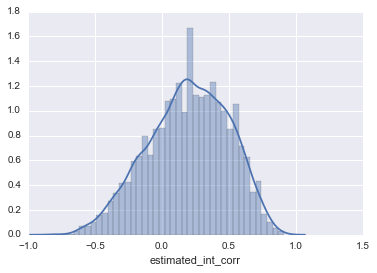

In [17]:
sns.distplot(df['estimated_int_corr'])

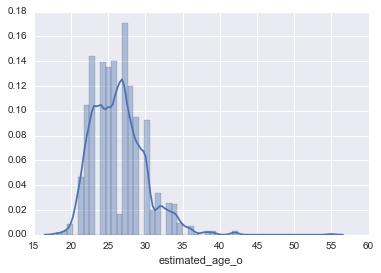

In [18]:
sns.distplot(df['estimated_age_o'])

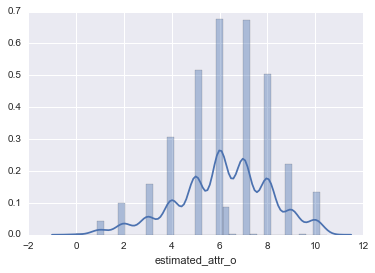

In [19]:
sns.distplot(df['estimated_attr_o'])

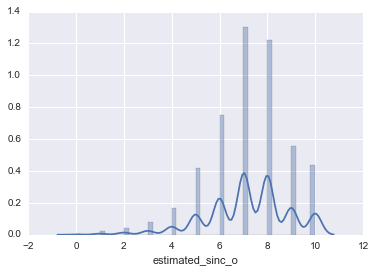

In [20]:
sns.distplot(df['estimated_sinc_o'])

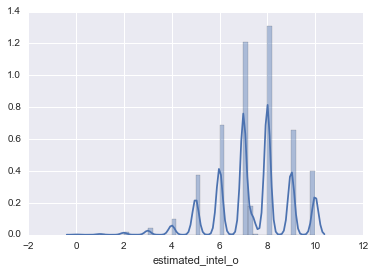

In [21]:
sns.distplot(df['estimated_intel_o'])

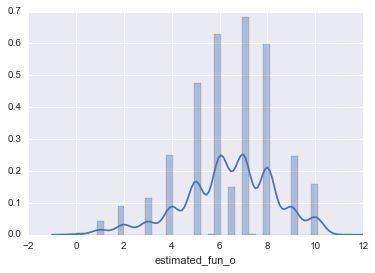

In [332]:
sns.distplot(df['estimated_fun_o'])

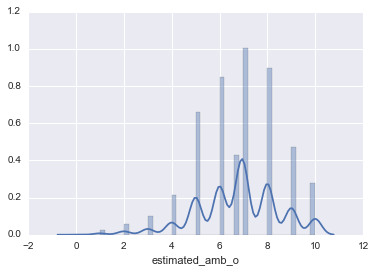

In [22]:
sns.distplot(df['estimated_amb_o'])

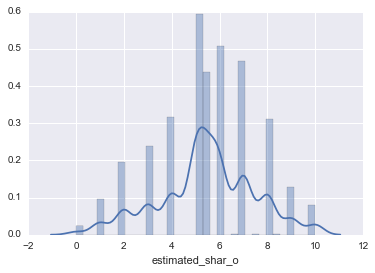

In [23]:
sns.distplot(df['estimated_shar_o'])

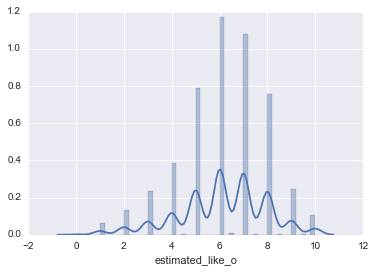

In [24]:
sns.distplot(df['estimated_like_o'])

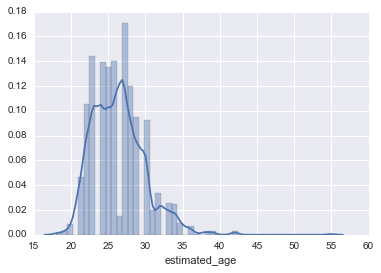

In [25]:
sns.distplot(df['estimated_age'])

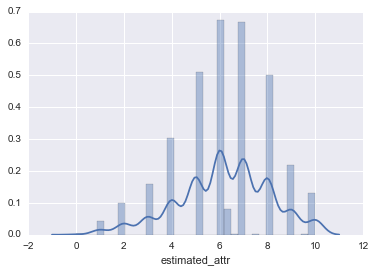

In [26]:
sns.distplot(df['estimated_attr'])

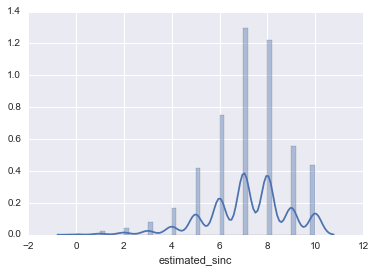

In [27]:
sns.distplot(df['estimated_sinc'])

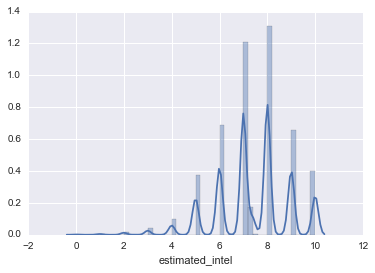

In [28]:
sns.distplot(df['estimated_intel'])

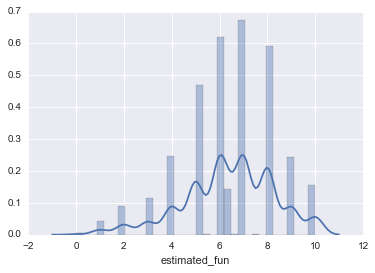

In [29]:
sns.distplot(df['estimated_fun'])

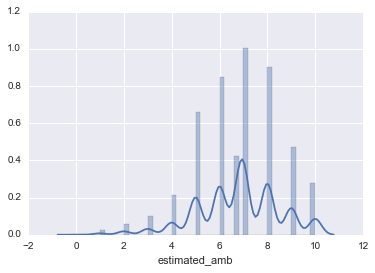

In [30]:
sns.distplot(df['estimated_amb'])

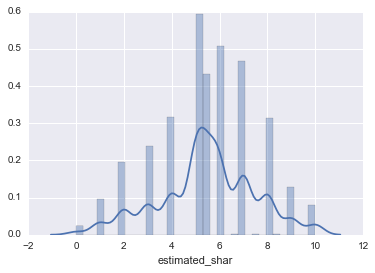

In [31]:
sns.distplot(df['estimated_shar'])

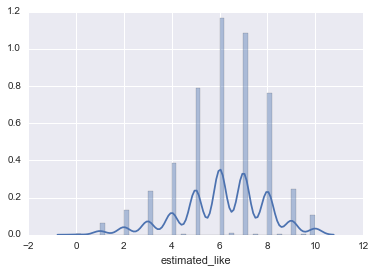

In [32]:
sns.distplot(df['estimated_like'])

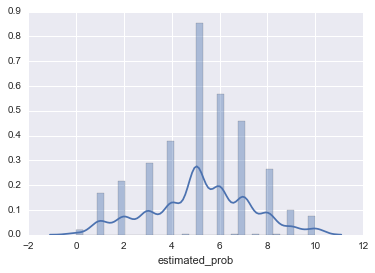

In [33]:
sns.distplot(df['estimated_prob'])

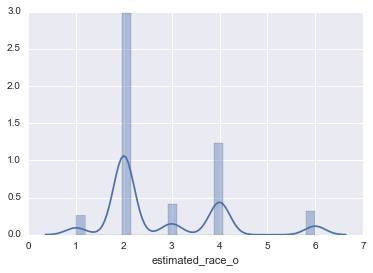

In [34]:
sns.distplot(df['estimated_race_o'])

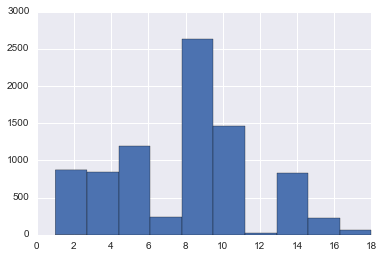

In [35]:
df['estimated_field_cd'].hist()

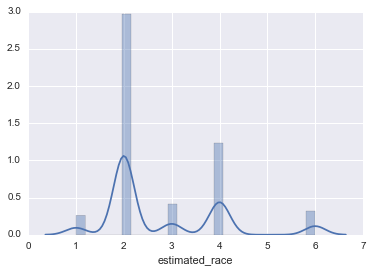

In [36]:
sns.distplot(df['estimated_race'])

In [37]:
# Create a correlation matrix for the data
df.corr()

,gender,match,samerace,dec_o,dec,estimated_int_corr,estimated_age_o,estimated_race_o,estimated_attr_o,estimated_sinc_o,estimated_intel_o,estimated_fun_o,estimated_amb_o,estimated_shar_o,estimated_like_o,estimated_age,estimated_field_cd,estimated_race,estimated_attr,estimated_sinc,estimated_intel,estimated_fun,estimated_amb,estimated_shar,estimated_like,estimated_prob,diff_age,diff_attr,diff_sinc,diff_intel,diff_fun,diff_amb,diff_shar,diff_like
gender,1.000000,-0.000530,-0.000966,-0.111550,0.110232,-0.000945,-0.071957,0.016777,-0.137186,-0.042707,0.049433,-0.059982,0.092767,-0.029037,-0.076032,0.070172,-0.080373,-0.017061,0.136963,0.042635,-0.049850,0.059956,-0.093178,0.028884,0.075765,-0.003742,0.000539,-0.000557,-0.000477,-0.000209,-0.000315,-0.000277,-0.000235,-0.000194
match,-0.000530,1.000000,0.013028,0.522326,0.521943,0.030790,-0.035632,-0.013394,0.259943,0.163473,0.168326,0.275272,0.135479,0.257579,0.304572,-0.034832,-0.024501,-0.013905,0.259814,0.163420,0.168431,0.275154,0.135609,0.257459,0.304481,0.253535,-0.067633,-0.133182,-0.076691,-0.074636,-0.124627,-0.041783,-0.068150,-0.147395
samerace,-0.000966,0.013028,1.000000,0.023626,0.023036,0.025031,0.005737,-0.263558,0.047439,0.011495,0.015561,0.010241,0.011566,0.057364,0.037994,0.007107,-0.025369,-0.264356,0.047521,0.011532,0.015913,0.010109,0.011938,0.057432,0.038150,0.082328,0.068819,0.010747,-0.015906,0.000124,-0.000420,-0.007698,-0.013724,-0.011514
dec_o,-0.111550,0.522326,0.023626,1.000000,-0.047038,0.018824,0.015043,0.055487,0.482109,0.206835,0.213395,0.406559,0.175546,0.375464,0.507363,-0.047566,0.020935,-0.069432,-0.058580,0.080268,0.080909,0.043186,0.061126,0.054264,0.038532,0.148267,-0.034238,-0.003984,-0.034391,-0.040389,-0.051508,-0.018153,-0.002678,-0.021674
dec,0.110232,0.521943,0.023036,-0.047038,1.000000,0.018341,-0.049065,-0.068914,-0.058724,0.080251,0.080560,0.043325,0.060746,0.054178,0.038362,0.015801,-0.034737,0.054408,0.482217,0.207109,0.214092,0.406943,0.176056,0.375758,0.507655,0.306079,-0.034332,-0.004494,-0.034787,-0.040588,-0.051370,-0.018770,-0.002958,-0.021977
estimated_int_corr,-0.000945,0.030790,0.025031,0.018824,0.018341,1.000000,0.088986,-0.030873,0.016040,0.012376,0.047463,0.012631,0.027544,0.046559,0.034935,0.090468,0.064906,-0.032341,0.016809,0.012689,0.047975,0.012767,0.028097,0.046941,0.035454,0.015563,0.019710,-0.013411,-0.016160,-0.029074,-0.060947,-0.027950,-0.041288,-0.033839
estimated_age_o,-0.071957,-0.035632,0.005737,0.015043,-0.049065,0.088986,1.000000,-0.057116,0.039345,0.013563,0.015232,0.004185,-0.024673,0.019478,0.026089,0.099012,0.066717,0.006410,-0.050432,0.006179,0.028079,-0.040973,0.017187,0.006501,-0.038891,-0.009376,0.300042,0.032561,0.001201,-0.000253,0.028305,-0.015641,-0.029670,0.030355
estimated_race_o,0.016777,-0.013394,-0.263558,0.055487,-0.068914,-0.030873,-0.057116,1.000000,-0.010907,-0.049893,-0.064485,-0.015828,-0.066854,0.002537,-0.018981,0.007439,0.006895,0.034028,-0.103013,0.023121,0.017471,-0.058435,-0.000411,-0.049934,-0.051375,-0.015129,-0.031461,-0.012453,-0.013534,-0.011225,-0.000154,0.014059,0.019837,-0.001316
estimated_attr_o,-0.137186,0.259943,0.047439,0.482109,-0.058724,0.016040,0.039345,-0.010907,1.000000,0.397262,0.388157,0.579248,0.346117,0.453311,0.664878,-0.050426,0.068387,-0.103141,-0.043421,0.086653,0.089869,0.049862,0.065182,0.071947,0.049216,0.157767,-0.022749,-0.138675,-0.121122,-0.077787,-0.099495,-0.067159,-0.062282,-0.108362
estimated_sinc_o,-0.042707,0.163473,0.011495,0.206835,0.080251,0.012376,0.013563,-0.049893,0.397262,1.000000,0.652427,0.485108,0.442114,0.376640,0.513782,0.006172,0.011201,0.023087,0.086650,0.081232,0.077116,0.117771,0.082150,0.112149,0.117221,0.086157,0.010956,-0.042575,-0.187682,-0.104228,-0.071620,-0.074741,-0.039571,-0.087770


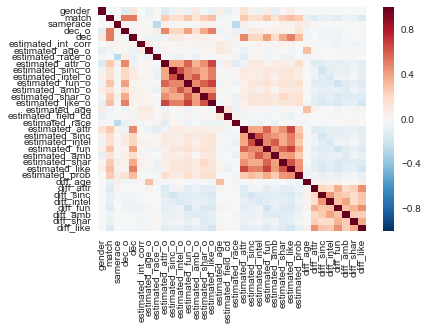

In [38]:
# Visualize correlation with heatmap
sns.heatmap(df.corr())

In [39]:
# Create gender subsets: female vs. male

df_female = df[df['gender'] == 0]
df_male = df[df['gender'] == 1]

print 'female pop:', len(df_female)
print 'male pop:', len(df_male)

female pop: 4184
male pop: 4194


In [40]:
# Create race subsets:

df_race_1 = df[df['estimated_race'] == 1]
df_race_2 = df[df['estimated_race'] == 2]
df_race_3 = df[df['estimated_race'] == 3]
df_race_4 = df[df['estimated_race'] == 4]
df_race_5 = df[df['estimated_race'] == 5]
df_race_6 = df[df['estimated_race'] == 6]

print 'Black/African American pop:', len(df_race_1)
print 'European/Caucasian American pop:', len(df_race_2)
print 'Latino/Hispanic American pop:', len(df_race_3)
print 'Asian/Pacific Islander/Asian American pop:', len(df_race_4)
print 'Native American pop:', len(df_race_5)
print 'Other pop:', len(df_race_6)

Black/African American pop: 420
European/Caucasian American pop: 4790
Latino/Hispanic American pop: 664
Asian/Pacific Islander/Asian American pop: 1982
Native American pop: 0
Other pop: 522


In [41]:
# Create fields subsets: 
df_law = df[df['estimated_field_cd'] == 1]
df_med = df[df['estimated_field_cd'].isin([3,4])]
df_sciences = df[df['estimated_field_cd'].isin([2,5,9,10,17])]
df_arts = df[df['estimated_field_cd'].isin([6,7,11,13,14,15,16])]
df_business = df[df['estimated_field_cd'] == 8]
df_others = df[df['estimated_field_cd'].isin([12,18])]

In [42]:
df_female.corr()

,gender,match,samerace,dec_o,dec,estimated_int_corr,estimated_age_o,estimated_race_o,estimated_attr_o,estimated_sinc_o,estimated_intel_o,estimated_fun_o,estimated_amb_o,estimated_shar_o,estimated_like_o,estimated_age,estimated_field_cd,estimated_race,estimated_attr,estimated_sinc,estimated_intel,estimated_fun,estimated_amb,estimated_shar,estimated_like,estimated_prob,diff_age,diff_attr,diff_sinc,diff_intel,diff_fun,diff_amb,diff_shar,diff_like
gender,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
match,NaN,1.000000,0.012605,0.467506,0.585587,0.030394,-0.034745,-0.038294,0.257420,0.152791,0.160726,0.252695,0.146686,0.232245,0.294285,-0.036689,-0.038650,0.011067,0.267386,0.173825,0.176041,0.297285,0.126312,0.282235,0.316310,0.254978,-0.067424,-0.133611,-0.076939,-0.074750,-0.124821,-0.041921,-0.068296,-0.147534
samerace,NaN,0.012605,1.000000,0.000005,0.046780,0.024291,0.026748,-0.249029,0.003302,-0.056592,-0.035132,-0.028594,-0.031143,0.020713,-0.007659,-0.013821,-0.055613,-0.279821,0.089320,0.070574,0.062377,0.045077,0.051638,0.092581,0.080538,0.103733,0.069315,0.010235,-0.016304,-0.000046,-0.000524,-0.007928,-0.013928,-0.011679
dec_o,NaN,0.467506,0.000005,1.000000,-0.035546,0.008251,-0.006239,0.063782,0.512618,0.188091,0.210665,0.399876,0.207799,0.364868,0.539647,-0.048713,0.005397,-0.045091,-0.038020,0.078673,0.072142,0.044519,0.050152,0.045166,0.042296,0.134258,-0.058004,0.055453,-0.025282,-0.025053,-0.026669,-0.025746,0.019821,0.026815
dec,NaN,0.585587,0.046780,-0.035546,1.000000,0.028424,-0.033470,-0.098744,-0.051312,0.094217,0.079726,0.057265,0.052053,0.071488,0.052778,0.020125,-0.048634,0.050324,0.439232,0.219151,0.230817,0.408563,0.168993,0.385398,0.470827,0.280955,-0.009148,-0.066793,-0.045168,-0.057230,-0.078252,-0.011027,-0.026463,-0.072604
estimated_int_corr,NaN,0.030394,0.024291,0.008251,0.028424,1.000000,0.090392,-0.057540,-0.004504,0.015600,0.036123,0.003290,0.001594,0.045087,0.043627,0.088339,0.025870,-0.005192,0.035459,0.009678,0.058169,0.021088,0.052118,0.048089,0.027183,0.013532,0.020472,-0.013482,-0.016172,-0.029143,-0.061015,-0.027968,-0.041041,-0.033590
estimated_age_o,NaN,-0.034745,0.026748,-0.006239,-0.033470,0.090392,1.000000,-0.075348,0.040873,0.041516,0.019372,-0.011696,-0.019902,-0.007509,0.014904,0.105133,0.039209,-0.004762,-0.024523,-0.005806,0.010758,-0.018687,0.020932,0.007703,-0.023834,0.025610,0.350812,0.073848,0.006530,0.022360,0.041537,0.019585,-0.024507,0.049840
estimated_race_o,NaN,-0.038294,-0.249029,0.063782,-0.098744,-0.057540,-0.075348,1.000000,0.029053,0.022245,-0.012804,0.036709,0.020884,0.060397,0.024856,0.014354,0.035202,0.034648,-0.153008,0.023755,0.023008,-0.061702,0.026502,-0.058729,-0.070453,-0.003167,-0.043658,0.015055,0.016513,0.011311,0.016099,0.029416,0.034309,0.025976
estimated_attr_o,NaN,0.257420,0.003302,0.512618,-0.051312,-0.004504,0.040873,0.029053,1.000000,0.400194,0.415517,0.558824,0.408155,0.428986,0.665607,-0.057927,0.046684,-0.056360,-0.025168,0.093320,0.081133,0.070319,0.055583,0.088626,0.064312,0.172510,-0.044344,0.040514,-0.065362,-0.029153,-0.022777,-0.047201,-0.002813,-0.002647
estimated_sinc_o,NaN,0.152791,-0.056592,0.188091,0.094217,0.015600,0.041516,0.022245,0.400194,1.000000,0.653606,0.493934,0.438422,0.364502,0.487722,0.025660,-0.007226,0.020888,0.094924,0.084104,0.079242,0.134293,0.058231,0.125705,0.133041,0.084549,0.002107,0.026932,-0.141548,-0.118599,-0.020140,-0.075503,0.000356,0.001702


In [43]:
df_male.corr()

,gender,match,samerace,dec_o,dec,estimated_int_corr,estimated_age_o,estimated_race_o,estimated_attr_o,estimated_sinc_o,estimated_intel_o,estimated_fun_o,estimated_amb_o,estimated_shar_o,estimated_like_o,estimated_age,estimated_field_cd,estimated_race,estimated_attr,estimated_sinc,estimated_intel,estimated_fun,estimated_amb,estimated_shar,estimated_like,estimated_prob,diff_age,diff_attr,diff_sinc,diff_intel,diff_fun,diff_amb,diff_shar,diff_like
gender,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
match,NaN,1.000000,0.013449,0.585851,0.467229,0.031185,-0.036755,0.011729,0.267274,0.173741,0.176044,0.297153,0.126373,0.282135,0.316153,-0.032989,-0.009282,-0.038629,0.257318,0.152687,0.160854,0.252457,0.146803,0.232000,0.294089,0.252084,-0.067841,-0.132754,-0.076445,-0.074522,-0.124435,-0.041646,-0.068004,-0.147256
samerace,NaN,0.013449,1.000000,0.048175,0.000679,0.025768,-0.013955,-0.278250,0.089053,0.070441,0.062420,0.044931,0.051779,0.092455,0.080331,0.029625,0.007417,-0.249183,0.003878,-0.056305,-0.034405,-0.028691,-0.030471,0.020946,-0.007117,0.060743,0.068325,0.011257,-0.015508,0.000293,-0.000317,-0.007470,-0.013521,-0.011351
dec_o,NaN,0.585851,0.048175,1.000000,-0.034849,0.029798,0.019977,0.051408,0.438698,0.218927,0.230737,0.408178,0.169035,0.385079,0.470364,-0.030549,0.019702,-0.099212,-0.050656,0.094219,0.080190,0.057011,0.052526,0.071598,0.053161,0.163989,-0.009956,-0.065687,-0.044383,-0.056853,-0.077981,-0.010589,-0.026059,-0.072225
dec,NaN,0.467229,0.000679,-0.034849,1.000000,0.009074,-0.048715,-0.044491,-0.038022,0.078549,0.072090,0.044420,0.050156,0.045087,0.042182,-0.004177,-0.002426,0.062673,0.512417,0.188561,0.211962,0.400353,0.208632,0.365177,0.539759,0.335185,-0.059112,0.055513,-0.025121,-0.025021,-0.026059,-0.026397,0.019674,0.026535
estimated_int_corr,NaN,0.031185,0.025768,0.029798,0.009074,1.000000,0.088090,-0.003990,0.035147,0.009590,0.058180,0.020953,0.052220,0.047971,0.027008,0.093443,0.108144,-0.059209,-0.002597,0.016336,0.037056,0.003702,0.002593,0.045864,0.044784,0.017602,0.018952,-0.013342,-0.016149,-0.029005,-0.060881,-0.027932,-0.041535,-0.034088
estimated_age_o,NaN,-0.036755,-0.013955,0.019977,-0.048715,0.088090,1.000000,-0.037991,0.020268,-0.014518,0.018422,0.009528,-0.016569,0.039742,0.025763,0.104523,0.084326,0.014397,-0.057886,0.025616,0.038701,-0.056007,0.000267,0.009509,-0.043658,-0.042906,0.254622,-0.005804,-0.003828,-0.021379,0.016094,-0.048633,-0.034699,0.012341
estimated_race_o,NaN,0.011729,-0.278250,0.051408,-0.044491,-0.003990,-0.037991,1.000000,-0.044038,-0.111957,-0.114451,-0.061453,-0.153366,-0.052392,-0.057565,-0.002415,-0.021538,0.034004,-0.055798,0.020996,0.013249,-0.057304,-0.026128,-0.041752,-0.033660,-0.027182,-0.019196,-0.040153,-0.043807,-0.033943,-0.016526,-0.001409,0.005269,-0.028824
estimated_attr_o,NaN,0.267274,0.089053,0.438698,-0.038022,0.035147,0.020268,-0.044038,1.000000,0.392143,0.385231,0.593208,0.325353,0.475977,0.660040,-0.025001,0.070141,-0.152662,-0.025174,0.094765,0.087238,0.047267,0.050958,0.065346,0.056728,0.146141,-0.003025,-0.307700,-0.175362,-0.124507,-0.172710,-0.087074,-0.118718,-0.208631
estimated_sinc_o,NaN,0.173741,0.070441,0.218927,0.078549,0.009590,-0.014518,-0.111957,0.392143,1.000000,0.658365,0.476155,0.457112,0.386215,0.532831,-0.005935,0.022204,0.023754,0.093159,0.084003,0.072215,0.109376,0.098231,0.103461,0.110983,0.087877,0.018731,-0.103051,-0.228874,-0.092469,-0.116685,-0.074585,-0.074405,-0.165838


In [347]:
df_race_1.corr()

,gender,match,samerace,dec_o,dec,estimated_int_corr,estimated_age_o,estimated_race_o,estimated_attr_o,estimated_sinc_o,estimated_intel_o,estimated_fun_o,estimated_amb_o,estimated_shar_o,estimated_like_o,estimated_age,estimated_field_cd,estimated_race,estimated_attr,estimated_sinc,estimated_intel,estimated_fun,estimated_amb,estimated_shar,estimated_like,estimated_prob,diff_age,diff_attr,diff_sinc,diff_intel,diff_fun,diff_amb,diff_shar,diff_like
gender,1.000000,-0.038661,0.031583,-0.075627,0.069544,-0.025216,-0.083813,0.014073,0.063869,-0.089860,0.004153,0.017197,0.036419,0.008977,0.005449,-0.042829,-0.204044,NaN,0.182499,0.212484,0.088681,0.119784,0.030980,0.096350,0.181246,0.076392,-0.106042,-0.065000,-0.022332,-0.022324,0.086033,0.098271,0.027872,0.043490
match,-0.038661,1.000000,0.186007,0.601884,0.496572,-0.053311,0.034425,0.030382,0.330787,0.215256,0.209234,0.335642,0.211379,0.338121,0.367977,-0.054856,-0.107340,NaN,0.250737,0.166684,0.148659,0.253701,0.144943,0.289660,0.266701,0.302463,-0.049916,-0.131707,-0.152391,-0.108596,-0.148073,-0.045651,-0.116151,-0.161720
samerace,0.031583,0.186007,1.000000,0.157301,0.114546,-0.110441,0.038375,-0.311604,0.095969,0.148887,0.165727,0.156588,0.200787,0.243792,0.183491,0.003185,-0.061960,NaN,0.045864,0.077525,0.064811,0.116809,0.130460,0.192793,0.111958,0.174692,-0.103754,-0.036757,-0.050215,-0.016635,-0.000283,0.027339,-0.063407,-0.075164
dec_o,-0.075627,0.601884,0.157301,1.000000,-0.026471,0.001050,0.028430,0.056883,0.437375,0.152255,0.221186,0.365782,0.217081,0.360486,0.429877,-0.040125,-0.045988,NaN,-0.037763,0.043045,0.088244,0.056640,0.033028,0.115148,0.065666,0.166391,-0.089257,-0.181504,-0.088506,-0.111687,-0.109824,-0.044366,-0.098411,-0.178710
dec,0.069544,0.496572,0.114546,-0.026471,1.000000,-0.081242,0.017301,-0.095582,0.003436,0.081013,0.022492,0.066534,0.037389,0.126607,0.091943,0.071247,-0.115697,NaN,0.519410,0.294880,0.165694,0.425232,0.214580,0.414646,0.516281,0.352917,0.049556,0.134621,0.030445,0.019831,0.038738,0.067668,0.035661,0.101165
estimated_int_corr,-0.025216,-0.053311,-0.110441,0.001050,-0.081242,1.000000,-0.039402,0.047641,0.025244,0.022565,0.067036,0.009475,0.036140,0.091622,0.033176,0.123611,0.166127,NaN,-0.078786,-0.054509,-0.000840,-0.053595,0.003070,0.022612,-0.035091,-0.021888,-0.021436,-0.036374,-0.081596,-0.018592,-0.022444,-0.057213,-0.011018,-0.112299
estimated_age_o,-0.083813,0.034425,0.038375,0.028430,0.017301,-0.039402,1.000000,-0.066748,0.053355,0.081011,0.070436,0.034410,0.021455,0.036149,-0.002505,0.198325,0.154467,NaN,-0.037536,-0.015037,0.048435,-0.078143,0.005913,-0.007623,-0.102490,-0.049638,0.195912,0.010825,0.052776,0.012228,-0.014068,-0.022199,-0.008603,0.040431
estimated_race_o,0.014073,0.030382,-0.311604,0.056883,-0.095582,0.047641,-0.066748,1.000000,0.008824,-0.057863,-0.061950,0.030679,-0.012023,0.037983,0.026424,-0.069633,-0.021803,NaN,-0.075925,-0.005854,-0.000274,-0.045033,-0.047356,-0.053519,-0.063371,0.025248,-0.079717,-0.024033,0.066271,0.080317,-0.023781,0.011125,0.003818,-0.009528
estimated_attr_o,0.063869,0.330787,0.095969,0.437375,0.003436,0.025244,0.053355,0.008824,1.000000,0.413438,0.465155,0.563140,0.497845,0.477729,0.697163,-0.013670,0.025232,NaN,-0.005868,0.081501,0.085152,0.026003,0.036600,0.099919,0.075808,0.216927,-0.027721,-0.394181,-0.259248,-0.254914,-0.202919,-0.218683,-0.235723,-0.344245
estimated_sinc_o,-0.089860,0.215256,0.148887,0.152255,0.081013,0.022565,0.081011,-0.057863,0.413438,1.000000,0.674679,0.545464,0.529504,0.498185,0.499625,0.094601,0.107943,NaN,0.071713,0.012885,0.151560,0.141173,0.127182,0.100169,0.101184,0.154312,0.084914,-0.188272,-0.548136,-0.371885,-0.218357,-0.255311,-0.273115,-0.255119


In [348]:
df_race_2.corr()

,gender,match,samerace,dec_o,dec,estimated_int_corr,estimated_age_o,estimated_race_o,estimated_attr_o,estimated_sinc_o,estimated_intel_o,estimated_fun_o,estimated_amb_o,estimated_shar_o,estimated_like_o,estimated_age,estimated_field_cd,estimated_race,estimated_attr,estimated_sinc,estimated_intel,estimated_fun,estimated_amb,estimated_shar,estimated_like,estimated_prob,diff_age,diff_attr,diff_sinc,diff_intel,diff_fun,diff_amb,diff_shar,diff_like
gender,1.000000,0.032180,-0.069646,-0.093283,0.128796,0.018001,-0.075241,0.024591,-0.115355,-0.037640,0.052248,-0.059922,0.079987,-0.018293,-0.064277,0.123437,-0.060979,NaN,0.088469,-0.060014,-0.132391,0.006787,-0.197164,-0.023799,0.024269,-0.068627,0.027251,-0.006118,-0.015381,-0.019196,-0.023015,-0.028069,-0.019163,-0.027610
match,0.032180,1.000000,0.024742,0.494210,0.562101,0.006675,-0.045926,-0.026247,0.253922,0.169817,0.172977,0.284323,0.132881,0.252099,0.301293,-0.040805,-0.009924,NaN,0.276545,0.153908,0.160153,0.288363,0.132196,0.267251,0.329671,0.267526,-0.059925,-0.155047,-0.059955,-0.065132,-0.120918,-0.045091,-0.070091,-0.156259
samerace,-0.069646,0.024742,1.000000,-0.050031,0.096445,0.044157,0.022737,-0.683102,0.019222,0.043055,0.041256,-0.002487,0.034351,0.021437,0.028133,-0.005970,-0.016916,NaN,0.103354,-0.033501,-0.009117,0.033851,-0.003973,0.094285,0.064061,0.066631,0.068778,0.022184,-0.005232,0.006556,0.010951,-0.000224,-0.019699,-0.004494
dec_o,-0.093283,0.494210,-0.050031,1.000000,-0.033790,0.001224,0.007910,0.033908,0.487432,0.236029,0.226977,0.429655,0.190038,0.376051,0.522464,-0.053347,0.056843,NaN,-0.069515,0.081616,0.069835,0.050574,0.078881,0.057257,0.046110,0.179414,-0.040513,0.003424,-0.024436,-0.030121,-0.041012,-0.025198,0.017098,-0.017880
dec,0.128796,0.562101,0.096445,-0.033790,1.000000,0.006560,-0.059408,-0.088438,-0.035897,0.074277,0.080137,0.056938,0.051652,0.062845,0.053912,-0.001517,-0.033524,NaN,0.494096,0.182302,0.197976,0.394417,0.148065,0.362934,0.503570,0.287284,-0.027281,-0.033977,-0.026434,-0.032454,-0.065228,-0.029442,-0.027657,-0.037628
estimated_int_corr,0.018001,0.006675,0.044157,0.001224,0.006560,1.000000,0.099942,-0.025345,-0.000546,0.005447,0.020749,-0.005890,0.000350,0.036374,0.018676,0.094465,0.044609,NaN,0.022973,0.007273,0.047404,0.014859,0.024718,0.048798,0.038001,0.002277,0.023300,-0.014233,-0.005917,-0.024374,-0.068523,-0.018655,-0.034415,-0.025179
estimated_age_o,-0.075241,-0.045926,0.022737,0.007910,-0.059408,0.099942,1.000000,-0.062753,0.021073,0.006592,0.005759,0.000671,-0.034011,0.015381,0.014603,0.068294,0.035817,NaN,-0.053186,0.018072,0.043213,-0.055967,0.032407,0.001906,-0.049394,-0.010987,0.284003,0.034403,0.004405,-0.004369,0.050431,-0.006074,-0.029216,0.045248
estimated_race_o,0.024591,-0.026247,-0.683102,0.033908,-0.088438,-0.025345,-0.062753,1.000000,-0.010636,-0.049287,-0.060570,-0.013072,-0.066451,-0.022730,-0.032372,0.012416,0.026451,NaN,-0.102774,0.034442,0.030642,-0.055411,0.016423,-0.074117,-0.061031,-0.042491,-0.048977,-0.018753,-0.021202,-0.010873,-0.013694,0.012189,0.030320,-0.003188
estimated_attr_o,-0.115355,0.253922,0.019222,0.487432,-0.035897,-0.000546,0.021073,-0.010636,1.000000,0.436610,0.411334,0.600598,0.363535,0.437829,0.679749,-0.074557,0.096950,NaN,-0.057727,0.086717,0.098917,0.062894,0.084891,0.079967,0.044763,0.191222,-0.047997,-0.099669,-0.125846,-0.074765,-0.074721,-0.060267,-0.023202,-0.090913
estimated_sinc_o,-0.037640,0.169817,0.043055,0.236029,0.074277,0.005447,0.006592,-0.049287,0.436610,1.000000,0.650851,0.512940,0.461233,0.403405,0.544833,0.008753,0.027744,NaN,0.085932,0.095078,0.087036,0.132109,0.100009,0.121070,0.132164,0.104295,0.000031,-0.033481,-0.216056,-0.114642,-0.062990,-0.082977,-0.028419,-0.082348


In [349]:
df_race_3.corr()

,gender,match,samerace,dec_o,dec,estimated_int_corr,estimated_age_o,estimated_race_o,estimated_attr_o,estimated_sinc_o,estimated_intel_o,estimated_fun_o,estimated_amb_o,estimated_shar_o,estimated_like_o,estimated_age,estimated_field_cd,estimated_race,estimated_attr,estimated_sinc,estimated_intel,estimated_fun,estimated_amb,estimated_shar,estimated_like,estimated_prob,diff_age,diff_attr,diff_sinc,diff_intel,diff_fun,diff_amb,diff_shar,diff_like
gender,1.000000,-0.026571,0.063813,-0.157777,0.083307,0.067529,-0.017115,-0.007639,-0.191383,-0.030992,0.038824,-0.102344,0.140046,-0.072355,-0.137172,0.022332,-0.067757,NaN,0.267984,0.214837,0.107731,0.229289,0.083549,0.178316,0.233360,0.169055,-0.023854,-0.153689,-0.106678,-0.054935,-0.093366,-0.083725,-0.056412,-0.075984
match,-0.026571,1.000000,0.034160,0.518882,0.577798,0.064050,-0.025111,0.034702,0.251701,0.190650,0.186218,0.196084,0.140552,0.225255,0.296875,-0.148066,-0.106360,NaN,0.302146,0.225591,0.219911,0.323547,0.172694,0.292007,0.327058,0.293015,-0.124459,-0.133831,-0.144347,-0.136220,-0.140218,-0.057078,-0.045447,-0.147963
samerace,0.063813,0.034160,1.000000,0.013420,0.044918,0.073252,0.097612,0.047317,-0.034526,-0.025445,0.054412,0.024436,0.068448,0.093816,0.024290,0.056548,-0.019093,NaN,0.067101,0.095994,0.097157,0.128556,0.091221,0.127603,0.124657,0.100794,0.067134,-0.005789,-0.081727,-0.068677,-0.060097,-0.077181,-0.031852,-0.062898
dec_o,-0.157777,0.518882,0.013420,1.000000,-0.000964,0.032245,0.053436,0.070687,0.503663,0.241129,0.273824,0.306223,0.166825,0.331063,0.491350,-0.075990,-0.052289,NaN,0.008805,0.109844,0.095042,0.094063,0.023291,0.118442,0.017668,0.167974,0.001571,0.100085,-0.051411,-0.076434,-0.020765,-0.023099,0.037998,0.082699
dec,0.083307,0.577798,0.044918,-0.000964,1.000000,0.060990,-0.022148,-0.063956,-0.073829,0.133768,0.078588,0.074482,0.052567,0.087010,0.057051,-0.111762,-0.132155,NaN,0.527292,0.279696,0.338996,0.474949,0.288491,0.402100,0.570375,0.318031,-0.151340,-0.107388,-0.098915,-0.123733,-0.176630,-0.067457,-0.055366,-0.147825
estimated_int_corr,0.067529,0.064050,0.073252,0.032245,0.060990,1.000000,0.152761,-0.057941,-0.016634,-0.012381,0.003802,-0.022085,0.009173,-0.003010,-0.022306,0.072422,0.072746,NaN,0.087814,0.064990,0.112338,0.082076,0.101485,0.123992,0.094423,0.092491,0.078440,-0.025647,-0.072578,-0.047072,-0.073931,-0.081708,-0.072180,-0.096166
estimated_age_o,-0.017115,-0.025111,0.097612,0.053436,-0.022148,0.152761,1.000000,-0.095952,0.043300,0.042162,0.009515,-0.019696,-0.051629,-0.003394,0.047246,0.119168,0.037862,NaN,-0.021562,-0.025829,0.005618,-0.004541,-0.004865,0.035804,-0.021315,-0.006184,0.194529,0.080324,0.008737,0.004765,0.019971,-0.007622,-0.017308,0.065758
estimated_race_o,-0.007639,0.034702,0.047317,0.070687,-0.063956,-0.057941,-0.095952,1.000000,0.015091,0.033216,0.036701,0.002246,-0.030388,0.024312,0.033483,-0.002239,-0.045122,NaN,-0.121025,0.031598,0.000906,-0.031156,-0.004390,-0.001352,-0.004152,0.030908,-0.003049,-0.008504,-0.050204,-0.026701,0.026088,0.031085,0.034005,-0.039571
estimated_attr_o,-0.191383,0.251701,-0.034526,0.503663,-0.073829,-0.016634,0.043300,0.015091,1.000000,0.409861,0.426572,0.439388,0.326146,0.410588,0.582754,-0.051702,-0.005042,NaN,-0.036533,0.104521,0.059865,0.032723,-0.014606,0.065142,-0.007956,0.150169,0.032752,0.041298,-0.026962,-0.039886,-0.017919,-0.043714,-0.026797,0.023126
estimated_sinc_o,-0.030992,0.190650,-0.025445,0.241129,0.133768,-0.012381,0.042162,0.033216,0.409861,1.000000,0.709633,0.521616,0.461897,0.400066,0.535569,0.028401,-0.031790,NaN,0.064553,0.125069,0.124893,0.106369,0.057847,0.120072,0.066218,0.079513,0.057110,0.019098,0.039503,-0.057492,0.027844,-0.033990,0.014705,0.008808


In [350]:
df_race_4.corr()

,gender,match,samerace,dec_o,dec,estimated_int_corr,estimated_age_o,estimated_race_o,estimated_attr_o,estimated_sinc_o,estimated_intel_o,estimated_fun_o,estimated_amb_o,estimated_shar_o,estimated_like_o,estimated_age,estimated_field_cd,estimated_race,estimated_attr,estimated_sinc,estimated_intel,estimated_fun,estimated_amb,estimated_shar,estimated_like,estimated_prob,diff_age,diff_attr,diff_sinc,diff_intel,diff_fun,diff_amb,diff_shar,diff_like
gender,1.000000,-0.056907,0.030850,-0.154227,0.078866,-0.054066,-0.107834,0.008221,-0.227011,-0.033751,0.050986,-0.056502,0.106204,-0.068790,-0.101079,-0.052241,-0.073686,NaN,0.169637,0.136268,0.042545,0.070594,0.015437,0.042068,0.069926,0.005336,-0.061437,0.070606,0.087895,0.082857,0.081638,0.092053,0.062459,0.095047
match,-0.056907,1.000000,-0.009183,0.551523,0.426517,0.074662,-0.016157,0.011183,0.232734,0.133116,0.144001,0.237529,0.115590,0.239602,0.273711,0.030510,0.000803,NaN,0.192456,0.130760,0.140810,0.215994,0.106945,0.203436,0.245376,0.199554,-0.069594,-0.094752,-0.099004,-0.070437,-0.130207,-0.034482,-0.078345,-0.122614
samerace,0.030850,-0.009183,1.000000,0.118210,-0.026821,-0.063621,-0.041777,0.550912,-0.004603,-0.013879,-0.056609,0.012524,-0.057620,0.087468,0.007333,0.029340,-0.024149,NaN,-0.122350,0.036175,0.030430,-0.085528,0.008981,0.015550,-0.048724,0.066397,0.024300,-0.011022,0.010641,0.003718,-0.002610,0.011236,0.008056,0.000631
dec_o,-0.154227,0.551523,0.118210,1.000000,-0.090756,0.017337,0.020454,0.113308,0.445045,0.158609,0.168619,0.377762,0.133999,0.370909,0.470650,-0.024625,-0.027513,NaN,-0.093919,0.035455,0.049585,-0.003795,0.015629,0.017265,0.016773,0.062974,-0.044879,-0.018165,-0.034387,-0.032731,-0.067481,-0.001018,-0.046230,-0.028267
dec,0.078866,0.426517,-0.026821,-0.090756,1.000000,0.088835,-0.031748,-0.036300,-0.101521,0.072689,0.088924,0.009923,0.068648,0.019985,-0.008029,0.109764,0.054861,NaN,0.453427,0.211720,0.233141,0.398224,0.195798,0.353027,0.498144,0.347684,-0.001582,0.045969,-0.056979,-0.045101,-0.008466,0.003529,0.029456,0.022664
estimated_int_corr,-0.054066,0.074662,-0.063621,0.017337,0.088835,1.000000,0.066367,-0.034684,0.007433,0.020752,0.108715,0.036336,0.081618,0.048360,0.053410,0.075085,0.072995,NaN,0.004912,0.020498,0.026632,-0.000158,0.011598,0.048049,0.047986,0.021710,-0.006014,-0.000427,-0.001700,-0.031138,-0.048238,-0.027792,-0.048217,-0.015182
estimated_age_o,-0.107834,-0.016157,-0.041777,0.020454,-0.031748,0.066367,1.000000,-0.018721,0.090219,0.007527,0.012963,0.030348,-0.017109,0.053626,0.055935,0.139264,0.131694,NaN,-0.048021,0.009082,0.022508,-0.005015,0.020411,0.022737,0.002778,0.003463,0.364393,0.032751,-0.003334,-0.005486,0.002406,-0.040584,-0.036389,-0.003113
estimated_race_o,0.008221,0.011183,0.550912,0.113308,-0.036300,-0.034684,-0.018721,1.000000,-0.009879,-0.073996,-0.103762,-0.030017,-0.086829,0.055304,-0.012694,0.022162,0.004224,NaN,-0.090071,0.020068,0.025055,-0.067965,-0.009023,-0.005479,-0.038282,0.035264,-0.002213,-0.001432,-0.008539,-0.030729,0.005629,0.018167,-0.005719,0.003318
estimated_attr_o,-0.227011,0.232734,-0.004603,0.445045,-0.101521,0.007433,0.090219,-0.009879,1.000000,0.342774,0.334989,0.562566,0.286235,0.469969,0.641079,-0.002161,0.067155,NaN,-0.054167,0.056022,0.044656,0.017471,0.017949,0.047965,0.052596,0.088601,-0.007580,-0.228570,-0.110251,-0.056458,-0.167988,-0.063003,-0.124304,-0.146485
estimated_sinc_o,-0.033751,0.133116,-0.013879,0.158609,0.072689,0.020752,0.007527,-0.073996,0.342774,1.000000,0.624019,0.415073,0.365143,0.297936,0.463823,-0.011779,-0.028299,NaN,0.100697,0.038105,0.008422,0.077500,0.032251,0.075407,0.099058,0.042517,0.012763,-0.047172,-0.114012,-0.028618,-0.096973,-0.035098,-0.045920,-0.100244


In [351]:
df_law.corr()

,gender,match,samerace,dec_o,dec,estimated_int_corr,estimated_age_o,estimated_race_o,estimated_attr_o,estimated_sinc_o,estimated_intel_o,estimated_fun_o,estimated_amb_o,estimated_shar_o,estimated_like_o,estimated_age,estimated_field_cd,estimated_race,estimated_attr,estimated_sinc,estimated_intel,estimated_fun,estimated_amb,estimated_shar,estimated_like,estimated_prob,diff_age,diff_attr,diff_sinc,diff_intel,diff_fun,diff_amb,diff_shar,diff_like
gender,1.000000,0.010934,-0.048276,-0.096247,0.121378,-0.029687,-0.070564,0.109348,-0.161080,-0.007616,0.005000,-0.064724,-0.021980,-0.019071,-0.113545,0.069335,NaN,0.034765,0.172976,0.020098,-0.059332,0.112473,-0.020817,0.099339,0.112136,0.119411,-0.047093,0.036507,0.023185,0.043488,-0.025662,0.069823,0.008677,0.006265
match,0.010934,1.000000,0.046811,0.576578,0.545884,0.006049,-0.055774,0.012027,0.288264,0.160601,0.207530,0.326485,0.184294,0.355062,0.346968,-0.103168,NaN,-0.001996,0.240255,0.102345,0.132264,0.260449,0.108042,0.295924,0.293881,0.273982,-0.141414,-0.111553,-0.048871,-0.108276,-0.137135,-0.018547,-0.063267,-0.158262
samerace,-0.048276,0.046811,1.000000,0.065247,0.066509,0.037519,0.069715,-0.265016,0.042823,-0.027454,0.021770,-0.032420,0.025750,0.073178,0.056300,0.003009,NaN,-0.211807,0.132720,-0.029091,0.018894,-0.006061,-0.017617,0.070731,0.104867,0.122993,0.083092,0.050448,0.017501,0.005252,0.003128,-0.021188,0.018597,-0.012334
dec_o,-0.096247,0.576578,0.065247,1.000000,0.010242,0.019217,-0.017109,0.003913,0.467401,0.161172,0.197263,0.380015,0.166538,0.380189,0.469238,-0.110331,NaN,0.001578,0.010142,0.132542,0.136959,0.061226,0.070815,0.109625,0.100894,0.194754,-0.072499,-0.115361,-0.014658,-0.081013,-0.128830,-0.029159,-0.008226,-0.163201
dec,0.121378,0.545884,0.066509,0.010242,1.000000,0.053257,-0.060975,-0.056036,0.007931,0.132917,0.163529,0.156351,0.125461,0.165393,0.112488,-0.104074,NaN,0.019150,0.459024,0.097069,0.158332,0.381009,0.143241,0.370759,0.461151,0.265087,-0.171098,0.049059,-0.040513,-0.084724,-0.111098,0.022366,-0.028584,0.009040
estimated_int_corr,-0.029687,0.006049,0.037519,0.019217,0.053257,1.000000,0.103235,0.023592,0.025673,-0.001990,0.032626,-0.030783,0.033313,0.010720,0.016293,0.162526,NaN,0.010346,0.055391,0.069264,0.070512,0.026146,0.050692,0.099709,0.099391,0.185627,0.057319,-0.026680,-0.032790,0.035641,-0.134377,-0.068609,-0.066474,-0.075702
estimated_age_o,-0.070564,-0.055774,0.069715,-0.017109,-0.060975,0.103235,1.000000,-0.018949,-0.050196,-0.050311,-0.085468,-0.108088,-0.070769,-0.083782,-0.109081,0.114167,NaN,-0.048932,-0.081597,-0.025825,0.004156,-0.103809,-0.039316,-0.047506,-0.131828,-0.049763,0.459351,0.021227,-0.001959,-0.015897,0.043929,-0.073033,-0.022916,0.028682
estimated_race_o,0.109348,0.012027,-0.265016,0.003913,-0.056036,0.023592,-0.018949,1.000000,-0.016998,-0.028909,-0.065465,-0.030128,-0.089961,-0.034418,-0.056907,0.030550,NaN,0.046054,-0.111771,0.050112,0.039382,-0.004708,0.002123,-0.039218,-0.044295,-0.022218,0.013920,0.069689,0.067707,0.068270,0.065191,0.077670,0.020154,0.022794
estimated_attr_o,-0.161080,0.288264,0.042823,0.467401,0.007931,0.025673,-0.050196,-0.016998,1.000000,0.384277,0.411864,0.609158,0.413009,0.475298,0.698751,-0.216991,NaN,0.043719,0.044803,0.204647,0.184525,0.112471,0.148495,0.117446,0.146921,0.211489,-0.147682,-0.271390,-0.169991,-0.151406,-0.151799,-0.093365,-0.051223,-0.272349
estimated_sinc_o,-0.007616,0.160601,-0.027454,0.161172,0.132917,-0.001990,-0.050311,-0.028909,0.384277,1.000000,0.662427,0.488215,0.464051,0.415520,0.526985,-0.024633,NaN,0.150423,0.194033,0.115994,0.119366,0.193581,0.148705,0.145059,0.164399,0.095970,-0.066434,-0.024206,-0.288057,-0.182723,-0.035795,-0.043317,-0.042041,-0.115175


In [352]:
df_med.corr()

,gender,match,samerace,dec_o,dec,estimated_int_corr,estimated_age_o,estimated_race_o,estimated_attr_o,estimated_sinc_o,estimated_intel_o,estimated_fun_o,estimated_amb_o,estimated_shar_o,estimated_like_o,estimated_age,estimated_field_cd,estimated_race,estimated_attr,estimated_sinc,estimated_intel,estimated_fun,estimated_amb,estimated_shar,estimated_like,estimated_prob,diff_age,diff_attr,diff_sinc,diff_intel,diff_fun,diff_amb,diff_shar,diff_like
gender,1.000000,-0.004720,-0.000506,-0.083670,0.085305,0.128144,-0.065676,0.002404,-0.120197,-0.113435,-0.007337,-0.151734,-0.033280,-0.086735,-0.110918,0.094017,-0.039053,-0.235279,0.160709,0.020070,0.000691,0.080122,0.023004,0.129517,0.144683,0.153478,-0.082418,0.053617,0.082570,0.091897,0.075114,0.059409,0.060764,0.050952
match,-0.004720,1.000000,-0.016650,0.574513,0.563538,0.032999,-0.038909,-0.036956,0.304591,0.188778,0.184514,0.296868,0.177225,0.281994,0.331559,-0.098901,0.127774,0.049315,0.199008,0.134338,0.135151,0.253663,0.118106,0.242428,0.268287,0.261438,-0.060159,-0.113052,-0.119847,-0.110290,-0.171059,-0.072478,-0.122678,-0.148100
samerace,-0.000506,-0.016650,1.000000,-0.093457,0.060414,0.005503,0.046186,-0.277033,-0.051520,0.010345,-0.023013,-0.020484,0.015138,-0.028080,-0.032588,0.039232,-0.146667,-0.219943,0.104970,0.040537,0.007547,0.018681,-0.011409,0.078760,0.050840,0.112704,0.074372,-0.018549,-0.036270,0.001189,-0.066681,-0.042103,-0.036918,-0.066567
dec_o,-0.083670,0.574513,-0.093457,1.000000,0.030905,0.041219,-0.001035,-0.001027,0.479431,0.232255,0.235390,0.389380,0.213705,0.394131,0.495436,-0.122157,0.189979,0.055408,-0.081232,-0.002740,-0.001950,0.030051,0.000631,0.054316,-0.003518,0.061694,-0.071494,-0.034164,-0.073871,-0.121206,-0.102101,-0.055286,-0.075117,-0.042078
dec,0.085305,0.563538,0.060414,0.030905,1.000000,-0.038360,-0.070085,-0.076471,-0.063512,0.046039,0.058464,0.036023,0.047183,0.062672,0.035420,-0.036593,0.015305,-0.005264,0.429919,0.215439,0.214292,0.384939,0.194472,0.352299,0.492507,0.349407,-0.009175,0.091454,0.002095,-0.033237,-0.059658,0.003929,0.040181,0.003720
estimated_int_corr,0.128144,0.032999,0.005503,0.041219,-0.038360,1.000000,0.104132,-0.041917,-0.003222,-0.017726,0.052858,0.011957,0.045264,0.071171,0.027233,0.123860,0.028051,-0.028844,0.041366,0.008191,0.061289,0.029630,0.006602,0.048952,0.027291,0.065013,-0.035656,0.018259,0.033212,-0.015648,-0.018652,-0.014725,-0.019500,-0.021076
estimated_age_o,-0.065676,-0.038909,0.046186,-0.001035,-0.070085,0.104132,1.000000,-0.064290,0.080051,0.061020,0.039752,0.073529,0.049167,0.095681,0.118486,0.122735,-0.054810,-0.013723,-0.084880,0.016735,0.020160,-0.007330,-0.021932,0.006120,-0.068436,-0.008071,0.305890,0.087989,0.006018,0.050518,0.054567,0.046990,0.040093,0.017179
estimated_race_o,0.002404,-0.036956,-0.277033,-0.001027,-0.076471,-0.041917,-0.064290,1.000000,-0.003217,-0.042880,-0.052433,-0.018160,-0.046552,0.019555,-0.038771,-0.012622,0.012577,0.060948,-0.142488,0.037246,0.030108,-0.070069,0.026565,-0.076460,-0.060109,-0.031742,-0.029433,-0.022388,0.063863,0.057734,0.076177,0.041793,0.005394,0.016463
estimated_attr_o,-0.120197,0.304591,-0.051520,0.479431,-0.063512,-0.003222,0.080051,-0.003217,1.000000,0.434825,0.441543,0.590825,0.443967,0.463706,0.675830,-0.139964,0.204353,0.035814,-0.116719,-0.032124,-0.032296,0.006297,-0.008741,0.070521,-0.033886,0.017881,-0.083602,-0.122746,-0.171244,-0.115390,-0.101249,-0.084393,-0.098742,-0.112137
estimated_sinc_o,-0.113435,0.188778,0.010345,0.232255,0.046039,-0.017726,0.061020,-0.042880,0.434825,1.000000,0.710404,0.565136,0.533907,0.406352,0.553989,0.021271,0.110955,0.073183,0.012372,-0.043349,-0.018269,0.048098,0.025836,0.060528,0.036478,-0.001797,-0.019490,-0.059536,-0.297205,-0.220202,-0.143720,-0.149047,-0.088145,-0.157876


In [353]:
df_sciences.corr() 

,gender,match,samerace,dec_o,dec,estimated_int_corr,estimated_age_o,estimated_race_o,estimated_attr_o,estimated_sinc_o,estimated_intel_o,estimated_fun_o,estimated_amb_o,estimated_shar_o,estimated_like_o,estimated_age,estimated_field_cd,estimated_race,estimated_attr,estimated_sinc,estimated_intel,estimated_fun,estimated_amb,estimated_shar,estimated_like,estimated_prob,diff_age,diff_attr,diff_sinc,diff_intel,diff_fun,diff_amb,diff_shar,diff_like
gender,1.000000,-0.002835,0.038273,-0.132437,0.093572,-0.020713,-0.124371,0.016258,-0.154917,-0.061173,0.044943,-0.071638,0.087188,-0.067456,-0.104607,-0.134999,-0.269899,-0.037317,0.107363,-0.002600,-0.101042,-0.004995,-0.138521,-0.061730,-0.002628,-0.129721,-0.040419,-0.021796,-0.000795,0.000865,-0.004648,0.002704,-0.004757,0.014256
match,-0.002835,1.000000,0.005020,0.537607,0.463174,0.033460,-0.058179,0.002635,0.268483,0.170782,0.147635,0.274250,0.141164,0.237141,0.290747,0.006718,0.043954,-0.033237,0.242167,0.174243,0.186819,0.260222,0.131343,0.237233,0.289265,0.258110,-0.097422,-0.140411,-0.074870,-0.068409,-0.092648,-0.033099,-0.053004,-0.132652
samerace,0.038273,0.005020,1.000000,0.053241,0.006872,0.042377,-0.012075,-0.189736,0.063657,-0.005388,0.056822,0.041677,0.018790,0.090653,0.046963,-0.016493,0.000580,-0.268815,0.013737,-0.019426,0.009267,-0.023736,0.016260,0.010456,0.011165,0.064832,0.038341,0.034488,-0.002066,0.017172,-0.014753,0.024456,-0.048830,0.017281
dec_o,-0.132437,0.537607,0.053241,1.000000,-0.079098,-0.003646,-0.016558,0.088284,0.480705,0.200313,0.192065,0.421681,0.162471,0.394056,0.501923,-0.011308,0.065710,-0.109543,-0.067440,0.112080,0.130895,0.046905,0.087325,0.050167,0.060164,0.144970,-0.038333,-0.025697,-0.013690,-0.023330,-0.062441,-0.021126,-0.026692,-0.056714
dec,0.093572,0.463174,0.006872,-0.079098,1.000000,0.030801,-0.048254,-0.069458,-0.061764,0.098208,0.075041,0.023476,0.070878,0.011427,0.010688,0.025426,0.001825,0.094156,0.474179,0.200149,0.207561,0.407622,0.154781,0.382753,0.502807,0.340354,-0.061315,0.013661,-0.030078,-0.032876,0.024741,-0.012906,0.019765,0.035077
estimated_int_corr,-0.020713,0.033460,0.042377,-0.003646,0.030801,1.000000,0.090243,-0.039216,0.029815,0.010836,0.063430,0.029958,0.012444,0.034282,0.039243,0.118683,0.129790,-0.075927,0.023853,0.032053,0.058012,0.020058,0.038215,0.016888,0.031867,-0.046916,0.018001,-0.024951,-0.023640,-0.049622,-0.061640,-0.039973,-0.054320,-0.033808
estimated_age_o,-0.124371,-0.058179,-0.012075,-0.016558,-0.048254,0.090243,1.000000,-0.034881,0.031584,0.019302,0.044260,0.017421,-0.020487,0.016086,0.015562,0.114056,0.129874,-0.021011,-0.052827,0.021549,0.014768,-0.034366,0.039460,0.029639,-0.031279,0.019184,0.463843,0.016968,0.009523,0.007606,0.025901,-0.010150,-0.041888,0.049798
estimated_race_o,0.016258,0.002635,-0.189736,0.088284,-0.069458,-0.039216,-0.034881,1.000000,-0.023427,-0.059859,-0.087484,-0.023506,-0.082413,0.034728,-0.028550,0.023044,-0.012444,0.020802,-0.105420,0.030883,0.016010,-0.039481,0.014875,-0.016386,-0.037812,-0.014741,-0.039675,-0.061246,-0.046380,-0.048033,-0.028216,-0.009454,0.007617,-0.038952
estimated_attr_o,-0.154917,0.268483,0.063657,0.480705,-0.061764,0.029815,0.031584,-0.023427,1.000000,0.364264,0.353879,0.585555,0.291983,0.472489,0.666066,0.017912,0.112263,-0.136329,-0.025112,0.089827,0.119924,0.060936,0.097666,0.075350,0.072942,0.163462,0.012700,-0.190329,-0.123508,-0.095027,-0.154056,-0.070250,-0.088531,-0.155649
estimated_sinc_o,-0.061173,0.170782,-0.005388,0.200313,0.098208,0.010836,0.019302,-0.059859,0.364264,1.000000,0.603158,0.436967,0.387486,0.309090,0.468103,-0.001610,0.015670,0.008955,0.089012,0.071911,0.047612,0.116591,0.084176,0.115666,0.130452,0.092351,-0.001627,-0.040196,-0.187142,-0.093078,-0.089240,-0.077238,-0.029678,-0.085633


In [354]:
df_arts.corr()

,gender,match,samerace,dec_o,dec,estimated_int_corr,estimated_age_o,estimated_race_o,estimated_attr_o,estimated_sinc_o,estimated_intel_o,estimated_fun_o,estimated_amb_o,estimated_shar_o,estimated_like_o,estimated_age,estimated_field_cd,estimated_race,estimated_attr,estimated_sinc,estimated_intel,estimated_fun,estimated_amb,estimated_shar,estimated_like,estimated_prob,diff_age,diff_attr,diff_sinc,diff_intel,diff_fun,diff_amb,diff_shar,diff_like
gender,1.000000,0.016331,-0.083904,-0.128259,0.170938,0.095188,-0.003545,0.012148,-0.150247,0.024413,0.102614,-0.037383,0.126678,0.055572,-0.035336,0.214790,0.092801,0.075959,0.277276,0.194418,0.103646,0.160043,-0.006576,0.117287,0.191786,0.001464,0.144108,-0.034706,0.021767,0.015346,-0.018089,-0.039008,-0.025517,-0.023335
match,0.016331,1.000000,0.030271,0.484371,0.539173,0.045983,-0.033822,-0.013990,0.237975,0.133195,0.160157,0.240901,0.091386,0.229162,0.301190,-0.060357,0.013777,0.020609,0.233014,0.165273,0.148831,0.270639,0.117267,0.230201,0.290073,0.229508,-0.045631,-0.127596,-0.089231,-0.086082,-0.119100,-0.043491,-0.052169,-0.142121
samerace,-0.083904,0.030271,1.000000,0.030864,0.052860,0.048881,0.027373,-0.327687,0.054017,0.015050,-0.008119,-0.024496,-0.010264,0.043037,0.037273,-0.000231,-0.135457,-0.324632,0.079554,0.061337,0.060048,0.063244,0.034218,0.102894,0.082677,0.087017,0.075651,-0.028420,-0.063848,-0.033430,0.006584,-0.030242,0.004376,-0.019112
dec_o,-0.128259,0.484371,0.030864,1.000000,-0.050254,0.039455,0.020251,0.078882,0.488261,0.186883,0.202345,0.385080,0.158577,0.351386,0.525638,-0.102339,0.019544,-0.057317,-0.074329,0.068015,0.051619,0.047289,0.042893,0.029547,0.012077,0.180915,-0.072663,0.014948,-0.037203,-0.028522,-0.021045,-0.016810,0.067088,0.040759
dec,0.170938,0.539173,0.052860,-0.050254,1.000000,0.018216,-0.037389,-0.086656,-0.063145,0.064560,0.061062,0.027782,0.037691,0.081736,0.080252,0.062476,0.030483,0.049847,0.466598,0.254914,0.235955,0.403598,0.168921,0.364393,0.508614,0.263455,0.039868,-0.017707,-0.058179,-0.078489,-0.087552,-0.045267,-0.048292,-0.063413
estimated_int_corr,0.095188,0.045983,0.048881,0.039455,0.018216,1.000000,0.124378,-0.050968,0.015009,0.028022,0.064477,0.035194,0.040915,0.098061,0.076220,0.010645,-0.074414,-0.028348,0.031529,0.032409,0.060581,0.020158,0.059745,0.056650,0.042862,0.018877,0.032040,-0.025999,-0.045046,-0.058429,-0.072047,-0.056592,-0.033198,-0.053673
estimated_age_o,-0.003545,-0.033822,0.027373,0.020251,-0.037389,0.124378,1.000000,-0.092453,0.013059,0.011084,0.004299,-0.034105,-0.061248,0.003394,0.006726,0.056368,-0.019614,0.004550,-0.014251,0.002623,0.035409,-0.040996,0.020209,-0.013710,-0.000791,-0.018802,0.253978,0.049322,0.012133,0.025215,0.038042,0.005128,-0.028715,0.033799
estimated_race_o,0.012148,-0.013990,-0.327687,0.078882,-0.086656,-0.050968,-0.092453,1.000000,0.021116,-0.021152,-0.043321,0.006411,-0.043967,-0.004277,0.004075,0.000528,0.010299,0.035561,-0.125317,0.011068,0.012208,-0.090567,0.008492,-0.074320,-0.084801,-0.013175,-0.012262,0.056251,0.017400,0.030176,0.007099,0.060016,0.027444,0.055607
estimated_attr_o,-0.150247,0.237975,0.054017,0.488261,-0.063145,0.015009,0.013059,0.021116,1.000000,0.414504,0.398278,0.534977,0.368807,0.403800,0.658067,-0.105430,0.068926,-0.112212,-0.055848,0.081177,0.086573,0.045479,0.040412,0.067771,0.051183,0.220697,-0.050429,-0.092683,-0.059795,-0.014917,-0.025069,-0.067270,0.003732,-0.022676
estimated_sinc_o,0.024413,0.133195,0.015050,0.186883,0.064560,0.028022,0.011084,-0.021152,0.414504,1.000000,0.664655,0.510069,0.486358,0.400415,0.531085,0.016883,0.016744,-0.015533,0.110899,0.127712,0.128789,0.133168,0.077607,0.118450,0.139351,0.113200,0.013073,-0.046638,-0.133967,-0.084310,-0.006017,-0.091821,-0.000963,-0.051657


In [355]:
df_business.corr()

,gender,match,samerace,dec_o,dec,estimated_int_corr,estimated_age_o,estimated_race_o,estimated_attr_o,estimated_sinc_o,estimated_intel_o,estimated_fun_o,estimated_amb_o,estimated_shar_o,estimated_like_o,estimated_age,estimated_field_cd,estimated_race,estimated_attr,estimated_sinc,estimated_intel,estimated_fun,estimated_amb,estimated_shar,estimated_like,estimated_prob,diff_age,diff_attr,diff_sinc,diff_intel,diff_fun,diff_amb,diff_shar,diff_like
gender,1.000000,-0.034971,0.082276,-0.145831,0.093733,-0.058781,-0.042362,-0.024577,-0.156328,-0.050495,0.010252,-0.060227,0.021567,-0.060995,-0.089287,0.093291,NaN,-0.011173,0.007471,-0.096939,-0.167136,-0.015584,-0.162919,-0.037878,-0.023065,0.050872,0.007832,0.070504,0.010646,-0.002521,0.055891,0.062917,0.061564,0.043873
match,-0.034971,1.000000,0.008277,0.503817,0.558316,0.028830,0.007508,-0.028304,0.243087,0.178603,0.176774,0.274119,0.122892,0.261795,0.294226,0.001181,NaN,-0.046517,0.344778,0.174315,0.189733,0.308481,0.180523,0.295546,0.352432,0.258013,-0.027952,-0.139936,-0.051261,-0.044418,-0.140086,-0.040486,-0.076095,-0.166946
samerace,0.082276,0.008277,1.000000,0.013714,-0.009014,-0.023800,-0.030550,-0.283226,0.059407,0.042354,0.003716,0.025913,0.034189,0.054203,0.048869,0.052398,NaN,-0.236903,0.008898,-0.002053,-0.018973,0.001807,0.006345,0.058804,0.002831,0.071051,0.103331,0.023940,0.010382,0.006231,0.041556,-0.005015,0.018115,-0.016235
dec_o,-0.145831,0.503817,0.013714,1.000000,-0.038928,0.018736,0.073002,0.039989,0.469813,0.252199,0.259138,0.411340,0.186354,0.353807,0.505464,0.003719,NaN,-0.079104,-0.024569,0.085893,0.083324,0.046216,0.080728,0.075395,0.049198,0.134339,0.048425,0.049015,-0.043491,-0.024262,-0.022878,0.009669,-0.018033,0.015037
dec,0.093733,0.558316,-0.009014,-0.038928,1.000000,0.018904,-0.047066,-0.056714,-0.041101,0.069243,0.079444,0.075404,0.056839,0.062363,0.028431,0.039654,NaN,0.021938,0.526874,0.176422,0.197961,0.415254,0.214042,0.379350,0.526869,0.309426,-0.047874,-0.073571,-0.030122,-0.001142,-0.089915,-0.015895,0.006748,-0.075468
estimated_int_corr,-0.058781,0.028830,-0.023800,0.018736,0.018904,1.000000,0.031502,-0.014840,-0.003890,0.013599,0.020157,-0.007046,0.062768,0.030124,0.001184,0.130481,NaN,-0.000627,-0.019361,-0.031308,0.019087,0.000890,-0.018192,0.081348,0.048978,0.031769,0.014602,-0.009904,-0.003782,0.003433,-0.056859,0.031295,-0.046655,-0.011883
estimated_age_o,-0.042362,0.007508,-0.030550,0.073002,-0.047066,0.031502,1.000000,-0.068881,0.092499,0.003635,0.010903,0.047116,0.015800,0.053972,0.073920,0.105643,NaN,0.054091,-0.048763,0.016964,0.066765,-0.030176,0.027815,0.031389,-0.020173,-0.017634,0.081056,0.010995,-0.032827,-0.067080,-0.006158,-0.057945,-0.052285,0.001364
estimated_race_o,-0.024577,-0.028304,-0.283226,0.039989,-0.056714,-0.014840,-0.068881,1.000000,-0.020318,-0.068903,-0.061839,-0.008266,-0.070329,-0.011383,0.001939,-0.011858,NaN,0.029273,-0.055529,0.019559,0.015833,-0.061995,-0.039410,-0.056395,-0.025130,-0.007216,-0.059653,-0.043292,-0.068770,-0.062145,-0.023735,-0.035969,0.040082,-0.026689
estimated_attr_o,-0.156328,0.243087,0.059407,0.469813,-0.041101,-0.003890,0.092499,-0.020318,1.000000,0.428840,0.417609,0.578753,0.327042,0.447132,0.643406,-0.038568,NaN,-0.129087,-0.022880,0.127152,0.106357,0.065272,0.064241,0.080205,0.053149,0.127369,0.022448,-0.089237,-0.137867,-0.076706,-0.088453,-0.044791,-0.081369,-0.080919
estimated_sinc_o,-0.050495,0.178603,0.042354,0.252199,0.069243,0.013599,0.003635,-0.068903,0.428840,1.000000,0.686465,0.500933,0.441787,0.422919,0.540999,-0.007826,NaN,0.004804,0.054152,0.094150,0.099488,0.121728,0.087287,0.123689,0.106728,0.086194,0.058321,-0.040185,-0.160438,-0.053150,-0.092580,-0.028815,-0.067308,-0.087454


In [358]:
# Save clean dataset to a csv for Final project - part 4

df.to_csv('Speed Dating Data clean.csv', index = False,encoding='utf-8')